<a href="https://colab.research.google.com/github/Deepjyot-Projects/PredictRedWine/blob/main/PredictRedWine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

connect to google drive and fetch the file

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your CSV file in Google Drive
file_path = '/content/drive/My Drive/Interviewqs/winequality-red.csv'

# Now you can use libraries like pandas to work with the CSV file
import pandas as pd

# Read the CSV file into a DataFrame
df = pd.read_csv(file_path,sep = ';')

# Display the first few rows of the DataFrame
print(df.head())


Mounted at /content/drive
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8      

check for nulls

In [ ]:
df.isnull().sum()

NameError: ignored

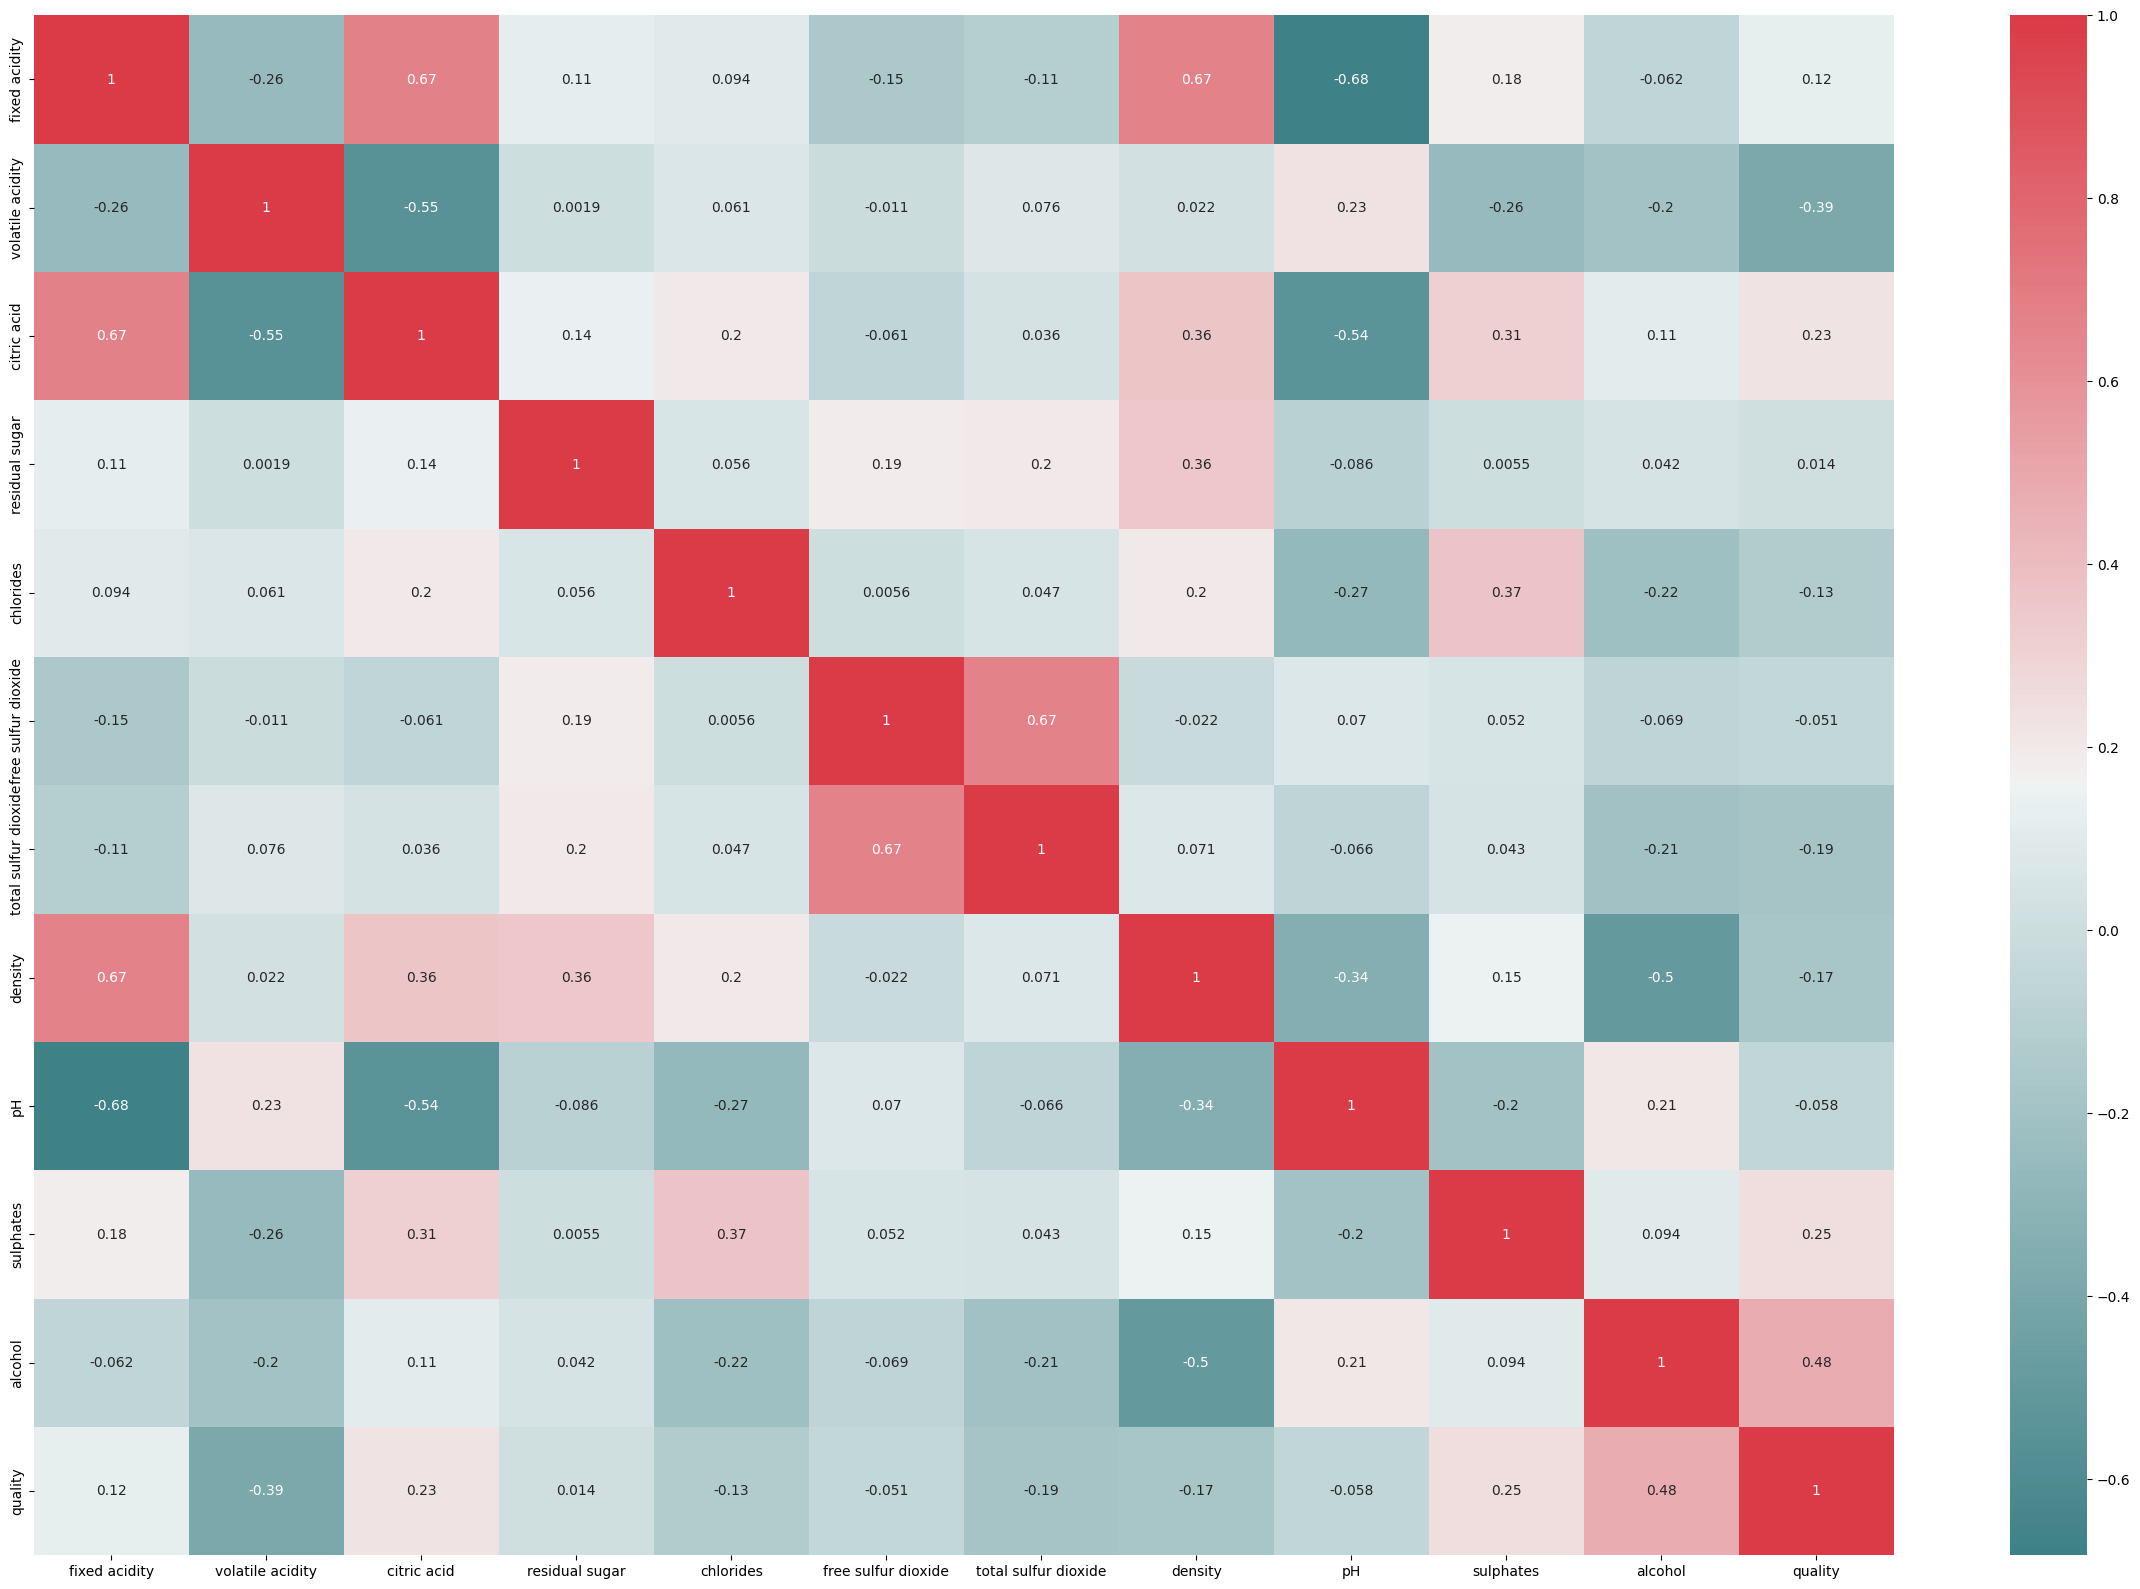

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(30,20))
corr = df.corr()

# ascmap = True is used to make the color map, which tells to show the color internsity
sns.heatmap(corr,annot=True,cmap=sns.diverging_palette(200, 10, as_cmap=True))
plt.show()

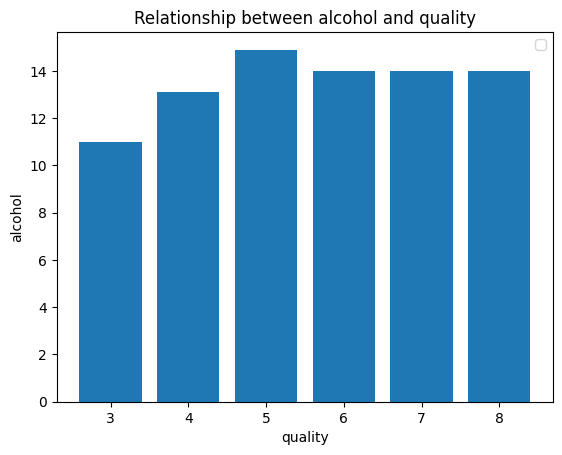

In [ ]:
plt.bar(df['quality'], df['alcohol'])
plt.title('Relationship between alcohol and quality')
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.legend()
plt.show()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range = (0,1))

normal_df = scaler.fit_transform(df)


normal_df = pd.DataFrame(normal_df, columns = df.columns)

print(normal_df.head())







   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       0.247788          0.397260         0.00        0.068493   0.106845   
1       0.283186          0.520548         0.00        0.116438   0.143573   
2       0.283186          0.438356         0.04        0.095890   0.133556   
3       0.584071          0.109589         0.56        0.068493   0.105175   
4       0.247788          0.397260         0.00        0.068493   0.106845   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0             0.140845              0.098940  0.567548  0.606299   0.137725   
1             0.338028              0.215548  0.494126  0.362205   0.209581   
2             0.197183              0.169611  0.508811  0.409449   0.191617   
3             0.225352              0.190813  0.582232  0.330709   0.149701   
4             0.140845              0.098940  0.567548  0.606299   0.137725   

    alcohol  quality  
0  0.153846      0.4  
1  0.21538

In [ ]:
df["good_wine"] = ["yes" if i>=7 else "no" for i in df["quality"]]

In [ ]:
df["good_wine"]

0       no
1       no
2       no
3       no
4       no
        ..
1594    no
1595    no
1596    no
1597    no
1598    no
Name: good_wine, Length: 1599, dtype: object

In [ ]:
X = normal_df.drop(["quality"], axis = 1)

y = df["good_wine"]




In [ ]:
y.value_counts()

no     1382
yes     217
Name: good_wine, dtype: int64

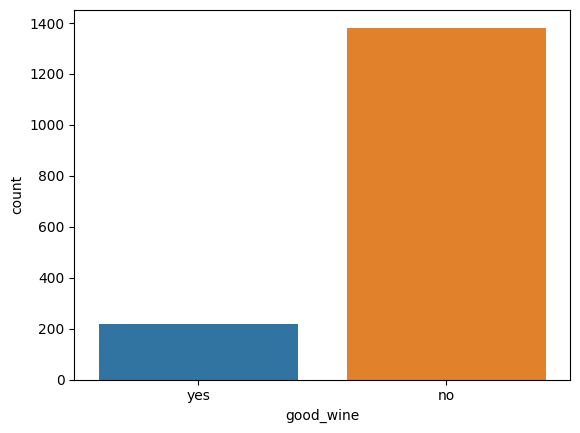

In [ ]:
# sns.countplot(data = df["good_wine"],order=['yes','no'])

sns.countplot(data=df, x="good_wine", order=['yes', 'no'])

plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2020, stratify=y)

In [ ]:
from sklearn.dummy import DummyClassifier
dummy_classifier = DummyClassifier(strategy='most_frequent',random_state=2020)
dummy_classifier.fit(X_train,y_train)
acc_baseline = dummy_classifier.score(X_test,y_test)
print("Baseline Accuracy = ", acc_baseline)

Baseline Accuracy =  0.8645833333333334


In [ ]:
from sklearn.svm import SVC
svc = SVC(random_state=2020)
svc.fit(X_train, y_train)

SVC(random_state=2020)

In [ ]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
y_pred = svc.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8854166666666666


In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(svc, X, y, cv=5)
print(scores.mean())

0.8642927115987462


In [ ]:
y_pred_train = svc.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

0.8927613941018767


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {"C": [0.001,0.01,0.1,1,10,100,1000]}
svc_random = RandomizedSearchCV(svc,random_grid,cv=5,random_state=2020)
svc_random.fit(X_train, y_train)
print(svc_random.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 7 is smaller than n_iter=10. Running 7 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'C': 1}


In [ ]:
from sklearn.model_selection import GridSearchCV
param_dist = {'C': [0.8,0.9,1,1.1,1.2,1.3,1.4],
              'kernel':['linear', 'rbf','poly']}
svc_cv = GridSearchCV(svc, param_dist, cv=10)
svc_cv.fit(X_train,y_train)
print(svc_cv.best_params_)

{'C': 1.3, 'kernel': 'rbf'}


In [ ]:
svc_new = SVC(C = 1.3, kernel = "rbf", random_state = 2020)
svc_new.fit(X_train, y_train)
y_pred_new = svc_new.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_new))

0.89375


Using random forest:

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 2020)
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=2020)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666


In [ ]:
y_pred_rf = rf_model.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)

Accuracy =  0.9166666666666666


In [ ]:
scores = cross_val_score(rf_model, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

In [ ]:
y_pred_train = rf_model.predict(X_train)
print(metrics.accuracy_score(y_train, y_pred_train))

1.0


In [ ]:
print(rf_model.get_params())


{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 2020, 'verbose': 0, 'warm_start': False}


In [ ]:
random_grid = {'max_depth': [1, 5, 10, 15],
'n_estimators': [100,200,300,400,500,600]}
rf_random = RandomizedSearchCV(rf_model,random_grid, n_iter = 50, cv = 5,random_state = 2020)
rf_random.fit(X_train, y_train)
print(rf_random.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 300, 'max_depth': 10}


In [ ]:
param_dist = {"max_depth":[7,8,9,10,11,12,13,14,15],      "n_estimators":[280,300,320,350,380,400,420,450,480]}
rf_cv = GridSearchCV(rf_model, param_dist, cv=5)
rf_cv.fit(X_train,y_train)
print(rf_cv.best_params_)

{'max_depth': 14, 'n_estimators': 450}


In [ ]:
rf_new = RandomForestClassifier(n_estimators = 450, max_depth =  14, random_state = 2020)
rf_new.fit(X_train,y_train)
y_pred_rf = rf_new.predict(X_test)
acc_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy = ', acc_rf)
scores = cross_val_score(rf_new, X, y, cv=5)
print("Cross Validation Score: ",scores.mean())

Accuracy =  0.9166666666666666
Cross Validation Score:  0.868669670846395


In [ ]:
imp_rf = pd.DataFrame(zip(X_train.columns, rf_model.feature_importances_),columns = ["feature", "importance"])
imp_rf.set_index("feature", inplace=True)
imp_rf.sort_values(by = "importance", ascending = False, inplace = True)
imp_rf.head()

,importance
feature,
alcohol,0.162224
volatile acidity,0.130491
sulphates,0.112694
density,0.096320
citric acid,0.093280


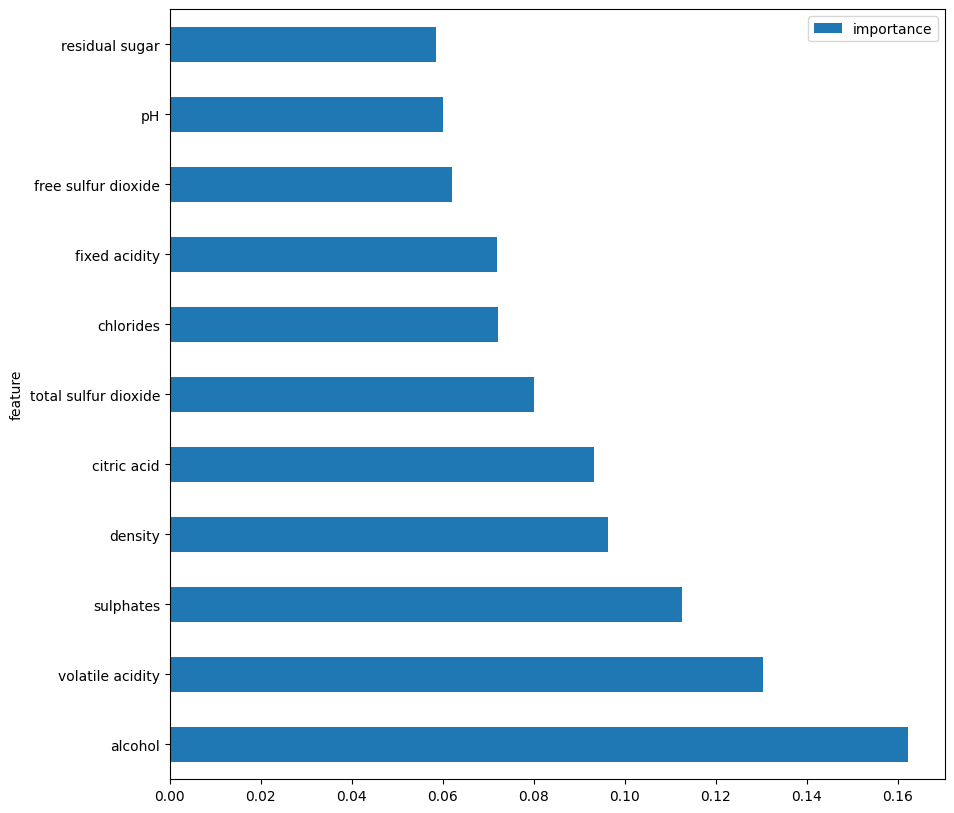

In [ ]:
imp_rf.plot.barh(figsize=(10,10))
plt.show()

In [ ]:
import numpy as np
print(np.average(df[df["good_wine"] == "yes"].alcohol))
print(np.average(df[df["good_wine"] == "no"].alcohol))

11.518049155145931
10.251037144235408


In [ ]:
df_good = df[df["good_wine"] == "yes"]
df_bad = df[df["good_wine"] == "no"]
print(np.average(df_good["volatile acidity"]))
print(np.average(df_bad["volatile acidity"]))

0.4055299539170507
0.5470224312590448


In [ ]:
https://allysonf.medium.com/predict-red-wine-quality-with-svc-decision-tree-and-random-forest-24f83b5f3408